This notebook will demonstrate producing a three-dimensional surface by revolution of the 2D function/data points around an axis. The notebook can be used as a reference for solving similar problems. 

In [177]:
#Main functions are in the two_d_to_3d library, the library only uses standard libraries like numpy, scipy and math for 
#all the calculations
import two_d_to_3d
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./plot_style_mk.mplstyle')
%matplotlib inline 
#Change this backend to '%matplotlib notebook' for interactive plots, inline is used for ease of 
#visualization in my case

## Simple sine(x) function as input example

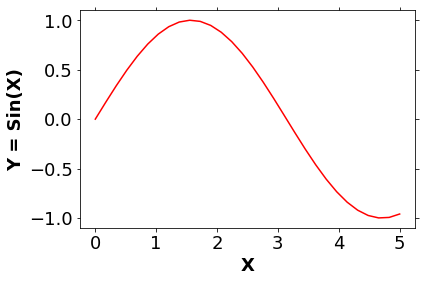

In [178]:
#Create an x,y array any standard or user defined function can be used here
#if you have a data set of an outline of an axially symmetric object (eg. from the outline of an image)
#that can be the x, y as well (keep in mind that if it is a full outline, easy modification will be to slice it in half)
x = np.linspace(0,5,30)
y = np.sin(x)

fig1, ax1 = plt.subplots()
ax1.plot(x, y, color = 'red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y = Sin(X)')
fig1.savefig('./Figures/2d_fun.png', bbox_inches = 'tight', dpi = 300)

## Surface creation

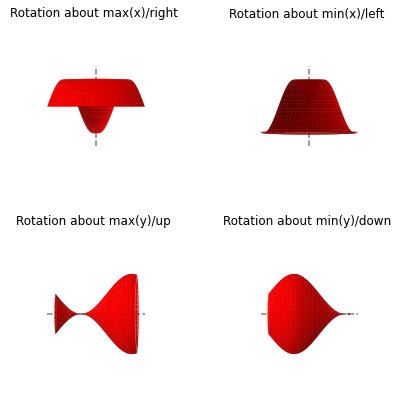

In [179]:
#revolve is the function which does the surface creation. Details about the function arguments can be found using shift+tab
xr, yr,zr = two_d_to_3d.revolve(x, y, axis_loc='right')
xl, yl,zl = two_d_to_3d.revolve(x, y, axis_loc='left')
xu, yu,zu = two_d_to_3d.revolve(x, y, axis_loc='up')
xd, yd,zd = two_d_to_3d.revolve(x, y, axis_loc='down')

wx = abs((np.max(x)-np.min(x))*0.1)
wy = abs((np.max(x)-np.min(x))*0.1)

fig2 = plt.figure(figsize = (7, 7))
ax2 = fig2.add_subplot(2,2,1, projection='3d')
ax2.plot_surface(xr, yr, zr, color = 'red')
ax2.plot([0, 0], [0, 0], [min(y)-wy, max(y)+wy], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)
ax2.set_title('Rotation about max(x)/right')
ax2.axis('off')
ax2 = fig2.add_subplot(2,2,2, projection='3d')
ax2.plot_surface(xl, yl, zl, color = 'red')
ax2.plot([0, 0], [0, 0], [min(y)-wy, max(y)+wy], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)
ax2.set_title('Rotation about min(x)/left')
ax2.axis('off')
ax2 = fig2.add_subplot(2,2,3, projection='3d')
ax2.plot_surface(xu, yu, zu, color = 'red')
ax2.plot([min(x)-wx, max(x)+wx], [0, 0], [0, 0], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)
ax2.set_title('Rotation about max(y)/up')
ax2.axis('off')             
ax2 = fig2.add_subplot(2,2,4, projection='3d')
ax2.plot_surface(xd, yd, zd, color = 'red')
ax2.plot([min(x)-wx, max(x)+wx], [0, 0], [0, 0], ls ='--', color = 'black', alpha = 0.5)
ax2.view_init(elev=0, azim=-90)     
ax2.set_title('Rotation about min(y)/down')
ax2.axis('off')
fig2.savefig('./Figures/3D_surfaces.png', bbox_inches='tight')

## Usine one surface and transforming it into a meshed surface using <code> pyvista </code>

A meshed surface can be saved as auto cad readable files like .stl and later used engineering applications or 3D printing. 

<IPython.core.display.Javascript object>


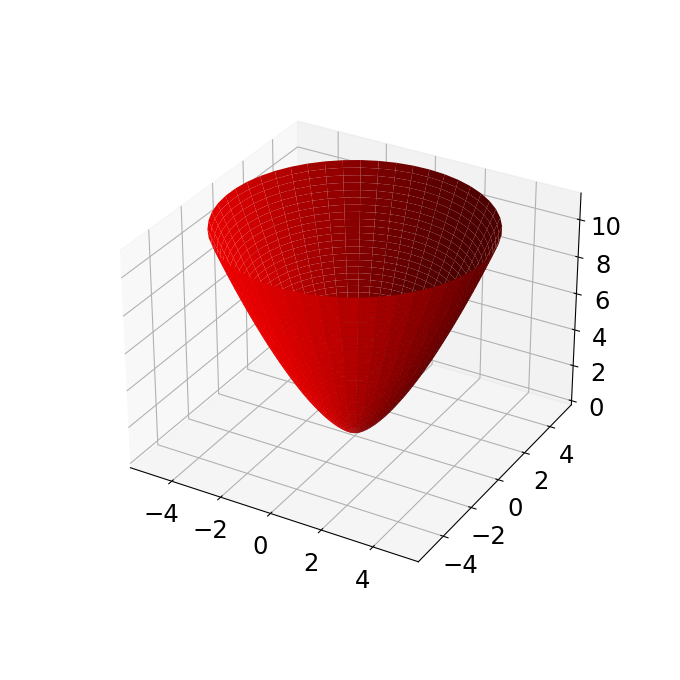

In [180]:
#create another type of surface
x = np.linspace(0,5,50)
y = np.power(x, 1.5)
xl, yl,zl = two_d_to_3d.revolve(x, y, axis_loc='left', interpolation=False)
%matplotlib notebook
fig3 = plt.figure(figsize = (7, 7))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(xl, yl, zl, color = 'red')

In [181]:
import pyvista as pv

#creating a point cloud for the surface in pyvista
points = np.c_[xl.reshape(-1), yl.reshape(-1), zl.reshape(-1)]
cloud = pv.PolyData(points)
cloud.plot(color="red", point_size=1, background = 'white')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [182]:
#creating a surface using the point cloud object in  py vista and saving them 
#there are somechanges we can do regarding the surface generation but most are found to create errors
#sample_spacing can be used for a larger mesh

surf = cloud.reconstruct_surface()
surf.plot(color="red",show_edges=True,background = 'white')
surf.save('simple_surface.stl')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)